

### Important Variables thats drives Churn in Telecom Industry
#### Cleaning the datasets already done in Churn prediction ML model py files. We have referred the same datasets here.

#### **Building Second Model** for important predictor attributes

### For predicting the important feature best model we choose Simple Logistic Regression & Decision Tree.

- RFE (Recursive Feature Elimination) is a popular feature selection method used in machine learning. It works by recursively removing attributes and building a model on those attributes that remain. It uses a model accuracy score to identify the most important features.
- The Recursive Feature Elimination method works by starting with all features and iteratively removing the weakest ones until the desired number of features is reached.
- It is important to note that RFE should be used as a preprocessing step before applying a machine learning model, as it can lead to unstable results if applied after the model is trained.

### For feature reduction, we use VIF (Variance Inflation Factor). 
- RFE need to apply for Feature reduction before applying Logistic model and then we will reduce feature by checking VIFs.
- For Decision Tree model Tree depth will be chosen appropriately so that based on important feature tree branch will divide.

###### Feature Selection Using RFE

### Considering Logistic Regression with RFE (15 features)


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')



### Applying the model on the test set and training set

In [3]:
# The Cleaned High Value Customers from telecom churn datasets
HVC_telecom = pd.read_csv('.datasets/HVC_telecom_cleaned.csv')
HVC_telecom.head()

,Unnamed: 0,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,av_vol_3g_mb_good,av_arpu_3g_good,av_arpu_2g_good,av_night_pck_user_good,av_monthly_2g_good,av_sachet_2g_good,av_monthly_3g_good,av_sachet_3g_good,av_fb_user_good,av_last_rech_day_good
0,0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,117.165,212.17,212.17,0.0,0.0,0.0,1.0,0.0,1.0,12.0
1,7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,9,170.231,22.43,78.34,0.00,0.00,22.43,34.93,0.00,0.00,...,0.000,0.00,0.00,0.0,0.5,0.0,0.0,0.0,0.5,4.5
3,13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,9.5
4,16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split the data into X and y

In [4]:
X = HVC_telecom.drop('Churn', axis = 1)
y = HVC_telecom['Churn']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=100)


### Scaling the dataset

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

In [7]:
print(type(X_train_scaled))
print(type(X_test_scaled))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Converting scaled values to dataframes

In [8]:
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_train.describe()


,Unnamed: 0,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,av_vol_3g_mb_good,av_arpu_3g_good,av_arpu_2g_good,av_night_pck_user_good,av_monthly_2g_good,av_sachet_2g_good,av_monthly_3g_good,av_sachet_3g_good,av_fb_user_good,av_last_rech_day_good
count,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04,...,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04,2.071700e+04
mean,-9.586171e-17,-1.642854e-16,5.281826e-17,3.686989e-17,3.429757e-17,2.417979e-17,6.036372e-17,-1.217564e-16,-4.475833e-17,-4.544428e-17,...,3.026760e-17,-7.202489e-17,6.036372e-17,1.063225e-17,-9.054558e-17,7.888441e-18,1.303308e-17,2.263640e-17,-1.275870e-16,-8.814475e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,...,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.724913e+00,-1.431529e+00,-4.874191e-01,-6.918567e-01,-1.802009e-01,-1.851938e-01,-3.548530e-01,-6.898098e-01,-3.598317e-01,-2.173630e-01,...,-3.705333e-01,-4.126736e-01,-4.306100e-01,-7.591892e-02,-4.194445e-01,-2.863255e-01,-3.625387e-01,-1.839125e-01,-7.237833e-01,-1.231892e+00
25%,-8.760760e-01,-5.844759e-01,-4.554608e-01,-5.574271e-01,-1.802009e-01,-1.851938e-01,-3.393910e-01,-6.147621e-01,-3.598317e-01,-2.173630e-01,...,-3.705333e-01,-3.606740e-01,-3.699804e-01,-7.591892e-02,-4.194445e-01,-2.863255e-01,-3.625387e-01,-1.839125e-01,-7.237833e-01,-8.107291e-01
50%,3.491578e-03,-2.243423e-01,-3.345990e-01,-2.977561e-01,-1.802009e-01,-1.851938e-01,-2.400258e-01,-3.248490e-01,-3.360300e-01,-2.173630e-01,...,-3.705333e-01,-3.606740e-01,-3.699804e-01,-7.591892e-02,-4.194445e-01,-2.863255e-01,-3.625387e-01,-1.839125e-01,-7.237833e-01,-2.842754e-01
75%,8.605904e-01,3.015184e-01,-1.396664e-02,1.778610e-01,-1.802009e-01,-1.851938e-01,-2.942298e-03,2.203004e-01,-6.677403e-02,-2.173630e-01,...,-2.359505e-01,-3.260662e-01,-2.832139e-01,-7.591892e-02,-4.194445e-01,-2.863255e-01,-3.625387e-01,-1.839125e-01,4.481291e-01,5.580506e-01
max,1.731758e+00,3.505471e+01,2.637993e+01,3.164544e+01,4.065774e+01,5.333062e+01,4.957180e+01,2.227976e+01,2.648197e+01,5.313226e+01,...,2.007087e+01,2.639593e+01,3.000993e+01,2.103565e+01,8.006184e+00,1.960238e+01,2.249356e+01,3.046866e+01,1.620041e+00,4.980262e+00


In [9]:
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [10]:
# Applying RFE on Logistic Regression
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)


In [11]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Unnamed: 0', False, 35),
 ('arpu_8', True, 1),
 ('onnet_mou_8', False, 29),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 48),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 10),
 ('loc_og_t2m_mou_8', False, 12),
 ('loc_og_t2f_mou_8', False, 24),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', False, 30),
 ('std_og_t2f_mou_8', True, 1),
 ('std_og_mou_8', False, 25),
 ('isd_og_mou_8', True, 1),
 ('spl_og_mou_8', True, 1),
 ('og_others_8', True, 1),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', True, 1),
 ('std_ic_t2m_mou_8', False, 13),
 ('std_ic_t2f_mou_8', True, 1),
 ('std_ic_mou_8', False, 38),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 49),
 ('ic_others_8', False, 21),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 

In [12]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8',
       'av_rech_amt_data_8', 'arpu_2g_8', 'night_pck_user_8', 'monthly_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'sep_vbc_3g', 'av_arpu_good', 'av_roam_ic_mou_good',
       'av_loc_og_t2f_mou_good', 'av_loc_og_t2c_mou_good',
       'av_std_og_mou_good', 'av_spl_og_mou_good', 'av_loc_ic_t2t_mou_good',
       'av_loc_ic_t2m_mou_good', 'av_loc_ic_mou_good',
       'av_std_ic_t2t_mou_good', 'av_isd_ic_mou_good',
       'av_total_rech_num_good', 'av_max_rech_da

### Statsmodels

In [13]:
import statsmodels.api as sm

In [14]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20717
Model:                            GLM   Df Residuals:                    20665
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Aug 2024   Deviance:                   2.1386e+05
Time:                        22:23:45   Pearson chi2:                 1.05e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -6.45e+14   4.66e+05  -1.38e+09      0.000   -6.45e+14   -6.45e+14
arpu_8                   -1.071e+14   1.19e+06  -9.04e+07      0.000   -1.07e+14   -1.07e+14
offnet_mou_8             -7.245e+13   1.61e+06  -4.49e+07      0.000   -7.25e+13   -7.25e+13
roam_og_mou_8             3.587e+12   5.62e+05   6.38e+06      0.000    3.59e+12    3.59e+12
loc_og_t2c_mou_8          1.458e+13   5.93e+05   2.46e+07      0.000    1.46e+13    1.46e+13
loc_og_mou_8             -3.764e+13   1.13e+06  -3.34e+07      0.000   -3.76e+13   -3.76e+13
std_og_t2t_mou_8         -3.494e+13   1.45e+06  -2.41e+07      0.000   -3.49e+13   -3.49e+13
std_og_t2f_mou_8         -2.926e+13   4.92e+05  -5.94e+07      0.000   -2.93e+13   -2.93e+13
isd_og_mou_8             -1.067e+14   6.01e+05  -1.78e+08      0.000   -1.07e+14   -1.07e+14
spl_og_mou_8             -5.111e+13   6.61e+05  -7.73e+07      0.000   -5.11e+13   -5.11e+13
og_others_8               3.028e+13   5.18e+05   5.84e+07      0.000    3.03e+13    3.03e+13
total_og_mou_8           -3.851e+13   2.57e+06   -1.5e+07      0.000   -3.85e+13   -3.85e+13
loc_ic_t2t_mou_8          3.585e+18   1.11e+10   3.22e+08      0.000    3.58e+18    3.58e+18
loc_ic_t2m_mou_8          4.648e+18   1.44e+10   3.22e+08      0.000    4.65e+18    4.65e+18
loc_ic_t2f_mou_8          1.024e+18   3.18e+09   3.22e+08      0.000    1.02e+18    1.02e+18
loc_ic_mou_8             -6.794e+18   2.11e+10  -3.22e+08      0.000   -6.79e+18   -6.79e+18
std_ic_t2t_mou_8         -1.044e+14   7.08e+05  -1.48e+08      0.000   -1.04e+14   -1.04e+14
std_ic_t2f_mou_8         -3.127e+13   5.02e+05  -6.23e+07      0.000   -3.13e+13   -3.13e+13
total_ic_mou_8           -2.272e+14   1.44e+06  -1.57e+08      0.000   -2.27e+14   -2.27e+14
spl_ic_mou_8             -1.604e+14   4.75e+05  -3.38e+08      0.000    -1.6e+14    -1.6e+14
total_rech_num_8         -6.151e+13    9.1e+05  -6.76e+07      0.000   -6.15e+13   -6.15e+13
last_day_rch_amt_8       -1.405e+14   5.29e+05  -2.66e+08      0.000   -1.41e+14   -1.41e+14
max_rech_data_8          -2.634e+13   1.39e+06  -1.89e+07      0.000   -2.63e+13   -2.63e+13
count_rech_2g_8          -3.193e+13   6.44e+05  -4.96e+07      0.000   -3.19e+13   -3.19e+13
count_rech_3g_8          -3.171e+13   6.03e+05  -5.26e+07      0.000   -3.17e+13   -3.17e+13
av_rech_amt_data_8        1.474e+14   1.71e+06   8.65e+07      0.000    1.47e+14    1.47e+14
arpu_2g_8                -1.108e+14   1.53e+06  -7.25e+07      0.000   -1.11e+14   -1.11e+14
night_pck_user_8          1.294e+13    4.8e+05    2.7e+07      0.000    1.29e+13    1.29e+13
monthly_2g_8             -4.432e+13   8.09e+05  -5.48e+07      0.000   -4.43e+13   -4.43e+13
monthly_3g_8             -3.331e+12   8.96e+05  -3.72e+06      0.000   -3.33e+12   -3.33e+12
sachet_3g_8   

### VIF dataframe

In [15]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,sachet_3g_8,inf
28,monthly_3g_8,inf
23,count_rech_3g_8,inf
14,loc_ic_mou_8,2.048959e+09
12,loc_ic_t2m_mou_8,9.590971e+08
11,loc_ic_t2t_mou_8,5.704958e+08
13,loc_ic_t2f_mou_8,4.656647e+07
43,av_loc_ic_mou_good,1.018800e+02
42,av_loc_ic_t2m_mou_good,5.502000e+01
10,total_og_mou_8,3.041000e+01


In [16]:
col = col.drop('sachet_3g_8', 1)

col

Index(['arpu_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8',
       'av_rech_amt_data_8', 'arpu_2g_8', 'night_pck_user_8', 'monthly_2g_8',
       'monthly_3g_8', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'sep_vbc_3g', 'av_arpu_good', 'av_roam_ic_mou_good',
       'av_loc_og_t2f_mou_good', 'av_loc_og_t2c_mou_good',
       'av_std_og_mou_good', 'av_spl_og_mou_good', 'av_loc_ic_t2t_mou_good',
       'av_loc_ic_t2m_mou_good', 'av_loc_ic_mou_good',
       'av_std_ic_t2t_mou_good', 'av_isd_ic_mou_good',
       'av_total_rech_num_good', 'av_max_rech_data_good',
     

In [17]:
col = col.drop('monthly_3g_8', 1)

In [18]:
col = col.drop('count_rech_3g_8', 1)

In [19]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20717
Model:                            GLM   Df Residuals:                    20667
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3783.8
Date:                Sun, 18 Aug 2024   Deviance:                       7567.6
Time:                        22:23:53   Pearson chi2:                 8.92e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2055
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3517      0.082    -53.179      0.000      -4.512      -4.191
arpu_8                      -0.1366      0.102     -1.343      0.179      -0.336       0.063
offnet_mou_8                -0.4184      0.219     -1.915      0.055      -0.847       0.010
roam_og_mou_8                0.1622      0.038      4.216      0.000       0.087       0.238
loc_og_t2c_mou_8             0.0820      0.058      1.405      0.160      -0.032       0.196
loc_og_mou_8                -0.4352      0.165     -2.642      0.008      -0.758      -0.112
std_og_t2t_mou_8            -0.3213      0.194     -1.658      0.097      -0.701       0.059
std_og_t2f_mou_8            -0.1753      0.100     -1.758      0.079      -0.371       0.020
isd_og_mou_8                -0.1317      0.115     -1.149      0.250      -0.356       0.093
spl_og_mou_8                -0.1595      0.095     -1.670      0.095      -0.347       0.028
og_others_8                  0.0504      0.035      1.420      0.155      -0.019       0.120
total_og_mou_8               0.1477      0.343      0.430      0.667      -0.525       0.820
loc_ic_t2t_mou_8          1.552e+04    932.185     16.644      0.000    1.37e+04    1.73e+04
loc_ic_t2m_mou_8          2.012e+04   1208.666     16.644      0.000    1.77e+04    2.25e+04
loc_ic_t2f_mou_8          4432.8392    266.330     16.644      0.000    3910.842    4954.837
loc_ic_mou_8             -2.941e+04   1766.582    -16.645      0.000   -3.29e+04   -2.59e+04
std_ic_t2t_mou_8            -0.2401      0.137     -1.749      0.080      -0.509       0.029
std_ic_t2f_mou_8            -0.1799      0.149     -1.210      0.226      -0.471       0.112
total_ic_mou_8              -0.5912      0.188     -3.146      0.002      -0.959      -0.223
spl_ic_mou_8                -0.6964      0.116     -6.002      0.000      -0.924      -0.469
total_rech_num_8            -0.3181      0.073     -4.358      0.000      -0.461      -0.175
last_day_rch_amt_8          -0.6007      0.058    -10.389      0.000      -0.714      -0.487
max_rech_data_8              0.0382      0.127      0.302      0.763      -0.210       0.286
count_rech_2g_8             -0.1122      0.073     -1.540      0.124      -0.255       0.031
av_rech_amt_data_8           0.1703      0.178      0.955      0.339      -0.179       0.520
arpu_2g_8                   -0.2924      0.167     -1.747      0.081      -0.621       0.036
night_pck_user_8             0.0607      0.038      1.592      0.111      -0.014       0.136
monthly_2g_8                -0.1806      0.089     -2.025      0.043      -0.355      -0.006
fb_user_8                   -0.4812      0.087     -5.539      0.000      -0.652      -0.311
aon                         -0.2421      0.038     -6.396      0.000      -0.316      -0.168
aug_vbc_3g    

In [20]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,loc_ic_mou_8,2.048904e+09
12,loc_ic_t2m_mou_8,9.590712e+08
11,loc_ic_t2t_mou_8,5.704804e+08
13,loc_ic_t2f_mou_8,4.656521e+07
40,av_loc_ic_mou_good,1.018800e+02
39,av_loc_ic_t2m_mou_good,5.502000e+01
10,total_og_mou_8,3.040000e+01
38,av_loc_ic_t2t_mou_good,3.019000e+01
46,av_av_rech_amt_data_good,1.252000e+01
1,offnet_mou_8,1.198000e+01


In [21]:
col = col.drop('av_std_og_mou_good', 1)
col


Index(['arpu_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'count_rech_2g_8', 'av_rech_amt_data_8', 'arpu_2g_8',
       'night_pck_user_8', 'monthly_2g_8', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'sep_vbc_3g', 'av_arpu_good', 'av_roam_ic_mou_good',
       'av_loc_og_t2f_mou_good', 'av_loc_og_t2c_mou_good',
       'av_spl_og_mou_good', 'av_loc_ic_t2t_mou_good',
       'av_loc_ic_t2m_mou_good', 'av_loc_ic_mou_good',
       'av_std_ic_t2t_mou_good', 'av_isd_ic_mou_good',
       'av_total_rech_num_good', 'av_max_rech_data_good',
       'av_count_rech_3g_good', 'av_av_rech_amt_data_good', 'av_arpu_

In [22]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20717
Model:                            GLM   Df Residuals:                    20668
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3783.8
Date:                Sun, 18 Aug 2024   Deviance:                       7567.6
Time:                        22:24:02   Pearson chi2:                 8.97e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2055
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3505      0.082    -53.299      0.000      -4.511      -4.191
arpu_8                      -0.1315      0.099     -1.331      0.183      -0.325       0.062
offnet_mou_8                -0.4179      0.218     -1.913      0.056      -0.846       0.010
roam_og_mou_8                0.1616      0.038      4.210      0.000       0.086       0.237
loc_og_t2c_mou_8             0.0819      0.058      1.402      0.161      -0.033       0.196
loc_og_mou_8                -0.4268      0.160     -2.670      0.008      -0.740      -0.113
std_og_t2t_mou_8            -0.3205      0.194     -1.654      0.098      -0.700       0.059
std_og_t2f_mou_8            -0.1754      0.100     -1.759      0.079      -0.371       0.020
isd_og_mou_8                -0.1275      0.113     -1.132      0.258      -0.348       0.093
spl_og_mou_8                -0.1589      0.095     -1.664      0.096      -0.346       0.028
og_others_8                  0.0502      0.035      1.414      0.158      -0.019       0.120
total_og_mou_8               0.1362      0.339      0.402      0.688      -0.528       0.800
loc_ic_t2t_mou_8          1.551e+04    931.858     16.645      0.000    1.37e+04    1.73e+04
loc_ic_t2m_mou_8          2.011e+04   1208.241     16.644      0.000    1.77e+04    2.25e+04
loc_ic_t2f_mou_8          4431.4021    266.236     16.645      0.000    3909.588    4953.216
loc_ic_mou_8              -2.94e+04   1765.961    -16.646      0.000   -3.29e+04   -2.59e+04
std_ic_t2t_mou_8            -0.2394      0.137     -1.744      0.081      -0.508       0.030
std_ic_t2f_mou_8            -0.1797      0.149     -1.209      0.227      -0.471       0.112
total_ic_mou_8              -0.5910      0.188     -3.146      0.002      -0.959      -0.223
spl_ic_mou_8                -0.6960      0.116     -6.001      0.000      -0.923      -0.469
total_rech_num_8            -0.3170      0.073     -4.355      0.000      -0.460      -0.174
last_day_rch_amt_8          -0.6006      0.058    -10.390      0.000      -0.714      -0.487
max_rech_data_8              0.0377      0.127      0.297      0.766      -0.210       0.286
count_rech_2g_8             -0.1125      0.073     -1.544      0.123      -0.255       0.030
av_rech_amt_data_8           0.1697      0.178      0.952      0.341      -0.180       0.519
arpu_2g_8                   -0.2928      0.167     -1.750      0.080      -0.621       0.035
night_pck_user_8             0.0608      0.038      1.594      0.111      -0.014       0.136
monthly_2g_8                -0.1809      0.089     -2.028      0.043      -0.356      -0.006
fb_user_8                   -0.4810      0.087     -5.536      0.000      -0.651      -0.311
aon                         -0.2418      0.038     -6.393      0.000      -0.316      -0.168
aug_vbc_3g    

In [23]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,loc_ic_mou_8,2.044117e+09
12,loc_ic_t2m_mou_8,9.568306e+08
11,loc_ic_t2t_mou_8,5.691478e+08
13,loc_ic_t2f_mou_8,4.645643e+07
39,av_loc_ic_mou_good,1.018800e+02
38,av_loc_ic_t2m_mou_good,5.498000e+01
37,av_loc_ic_t2t_mou_good,3.019000e+01
10,total_og_mou_8,2.798000e+01
45,av_av_rech_amt_data_good,1.251000e+01
1,offnet_mou_8,1.198000e+01


In [24]:
y_train_pred= pd.DataFrame({'Churn_actual':y_train.values,'Churn_Prob': res.predict(X_train_sm)})


In [25]:
y_train_pred['predicted'] = y_train_pred.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)


In [26]:
from sklearn import metrics  # Import metrics module
y_train_pred.head()

print(metrics.accuracy_score(y_train_pred.Churn_actual, y_train_pred.predicted))

0.9291403195443356


In [27]:
col = col.drop('fb_user_8', 1)
col

Index(['arpu_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'count_rech_2g_8', 'av_rech_amt_data_8', 'arpu_2g_8',
       'night_pck_user_8', 'monthly_2g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'sep_vbc_3g', 'av_arpu_good', 'av_roam_ic_mou_good',
       'av_loc_og_t2f_mou_good', 'av_loc_og_t2c_mou_good',
       'av_spl_og_mou_good', 'av_loc_ic_t2t_mou_good',
       'av_loc_ic_t2m_mou_good', 'av_loc_ic_mou_good',
       'av_std_ic_t2t_mou_good', 'av_isd_ic_mou_good',
       'av_total_rech_num_good', 'av_max_rech_data_good',
       'av_count_rech_3g_good', 'av_av_rech_amt_data_good', 'av_arpu_3g_good',
   

In [28]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20717
Model:                            GLM   Df Residuals:                    20669
Model Family:                Binomial   Df Model:                           47
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3799.3
Date:                Sun, 18 Aug 2024   Deviance:                       7598.7
Time:                        22:24:09   Pearson chi2:                 8.61e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2043
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3446      0.082    -53.218      0.000      -4.505      -4.185
arpu_8                      -0.1497      0.097     -1.540      0.124      -0.340       0.041
offnet_mou_8                -0.4017      0.218     -1.840      0.066      -0.830       0.026
roam_og_mou_8                0.1678      0.039      4.354      0.000       0.092       0.243
loc_og_t2c_mou_8             0.0853      0.059      1.448      0.148      -0.030       0.201
loc_og_mou_8                -0.4152      0.160     -2.603      0.009      -0.728      -0.103
std_og_t2t_mou_8            -0.3059      0.193     -1.583      0.113      -0.685       0.073
std_og_t2f_mou_8            -0.1737      0.099     -1.749      0.080      -0.368       0.021
isd_og_mou_8                -0.1118      0.111     -1.010      0.312      -0.329       0.105
spl_og_mou_8                -0.1731      0.096     -1.795      0.073      -0.362       0.016
og_others_8                  0.0526      0.035      1.504      0.133      -0.016       0.121
total_og_mou_8               0.1505      0.338      0.445      0.656      -0.513       0.814
loc_ic_t2t_mou_8          1.555e+04    930.845     16.707      0.000    1.37e+04    1.74e+04
loc_ic_t2m_mou_8          2.016e+04   1206.929     16.706      0.000    1.78e+04    2.25e+04
loc_ic_t2f_mou_8          4443.0528    265.947     16.707      0.000    3921.806    4964.300
loc_ic_mou_8             -2.947e+04   1764.043    -16.708      0.000   -3.29e+04    -2.6e+04
std_ic_t2t_mou_8            -0.2330      0.136     -1.714      0.087      -0.499       0.033
std_ic_t2f_mou_8            -0.1839      0.149     -1.234      0.217      -0.476       0.108
total_ic_mou_8              -0.5892      0.187     -3.147      0.002      -0.956      -0.222
spl_ic_mou_8                -0.7046      0.116     -6.071      0.000      -0.932      -0.477
total_rech_num_8            -0.3388      0.073     -4.652      0.000      -0.482      -0.196
last_day_rch_amt_8          -0.6169      0.058    -10.548      0.000      -0.732      -0.502
max_rech_data_8             -0.3189      0.117     -2.725      0.006      -0.548      -0.090
count_rech_2g_8             -0.2394      0.076     -3.138      0.002      -0.389      -0.090
av_rech_amt_data_8           0.1922      0.183      1.053      0.292      -0.166       0.550
arpu_2g_8                   -0.2713      0.170     -1.598      0.110      -0.604       0.061
night_pck_user_8             0.0434      0.039      1.102      0.270      -0.034       0.121
monthly_2g_8                -0.2515      0.089     -2.825      0.005      -0.426      -0.077
aon                         -0.2408      0.038     -6.382      0.000      -0.315      -0.167
aug_vbc_3g                  -0.1639      0.081     -2.028      0.043      -0.322      -0.005
jul_vbc_3g    

In [29]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,loc_ic_mou_8,2.043068e+09
12,loc_ic_t2m_mou_8,9.563392e+08
11,loc_ic_t2t_mou_8,5.688554e+08
13,loc_ic_t2f_mou_8,4.643257e+07
38,av_loc_ic_mou_good,1.018800e+02
37,av_loc_ic_t2m_mou_good,5.498000e+01
36,av_loc_ic_t2t_mou_good,3.019000e+01
10,total_og_mou_8,2.798000e+01
44,av_av_rech_amt_data_good,1.245000e+01
1,offnet_mou_8,1.198000e+01


In [30]:
y_train_pred= pd.DataFrame({'Churn_actual':y_train.values,'Churn_Prob': res.predict(X_train_sm)})

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred['predicted'] = y_train_pred.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred.head()

print(metrics.accuracy_score(y_train_pred.Churn_actual, y_train_pred.predicted))


0.9288507023217647


In [31]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,Churn_actual,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
13568,0,0.020408,0,1,0,0,0,0,0,0,0,0,0
28122,0,0.002730,0,1,0,0,0,0,0,0,0,0,0
1574,1,0.395800,0,1,1,1,1,0,0,0,0,0,0
13548,0,0.002583,0,1,0,0,0,0,0,0,0,0,0
8840,0,0.016979,0,1,0,0,0,0,0,0,0,0,0


In [32]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

     prob  accuracy     sensi     speci
0.0   0.0  0.087899  1.000000  0.000000
0.1   0.1  0.840614  0.831411  0.841501
0.2   0.2  0.905006  0.753432  0.919613
0.3   0.3  0.928851  0.695222  0.951365
0.4   0.4  0.937732  0.605711  0.969729
0.5   0.5  0.928851  0.352004  0.984441
0.6   0.6  0.922045  0.182867  0.993279
0.7   0.7  0.917797  0.098298  0.996772
0.8   0.8  0.913839  0.036793  0.998359
0.9   0.9  0.913260  0.017573  0.999577


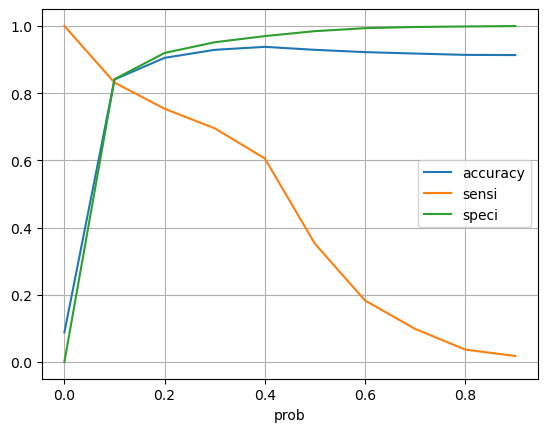

In [33]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Churn_actual, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid("dark_whitegrid")
plt.show()

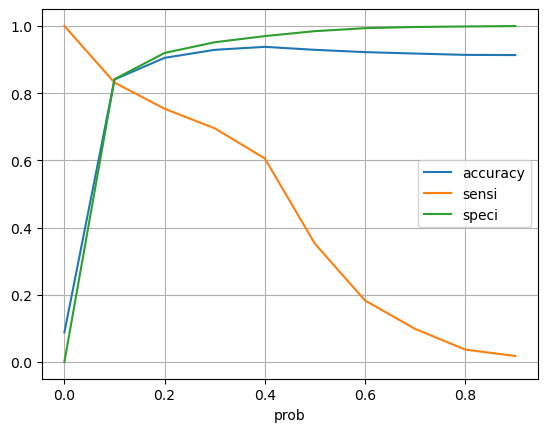

In [34]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid("dark_whitegrid")
plt.show()


In [35]:
y_train_pred['final_predicted'] = y_train_pred.Churn_Prob.map( lambda x: 1 if x > 0.15 else 0)

print("Train Accuracy Score: ",metrics.accuracy_score(y_train_pred.Churn_actual, y_train_pred.final_predicted))
print("Train Recall Score: ",metrics.recall_score(y_train_pred.Churn_actual, y_train_pred.final_predicted))
print(metrics.confusion_matrix(y_train_pred.Churn_actual, y_train_pred.final_predicted))

Train Accuracy Score:  0.8851667712506637
Train Recall Score:  0.7874794069192751
[[16904  1992]
 [  387  1434]]


In [36]:
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

In [37]:
y_pred_df = pd.DataFrame({'y_test_prob':y_test_pred, 'y_test_actual': y_test})
y_pred_df['final_predicted'] = y_pred_df.y_test_prob.map( lambda x: 1 if x > 0.15 else 0)


In [38]:
print("Train Accuracy Score: ",metrics.accuracy_score(y_pred_df.y_test_actual, y_pred_df.final_predicted))
print("Train Recall Score: ",metrics.recall_score(y_pred_df.y_test_actual, y_pred_df.final_predicted))
print(metrics.confusion_matrix(y_pred_df.y_test_actual, y_pred_df.final_predicted))


Train Accuracy Score:  0.8817434395765289
Train Recall Score:  0.7784974093264249
[[7228  879]
 [ 171  601]]


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(3, 25, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, scoring='recall', verbose = 1, return_train_score= True,)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

# printing the optimal accuracy score and hyperparameters
print("DecisionTree score: {0}".format(grid_search.best_score_))
print("DecisionTree params: {0}".format(grid_search.best_estimator_))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
DecisionTree score: 0.8484329369260877
DecisionTree params: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=18, min_samples_leaf=100,
                       min_samples_split=50)


In [40]:
dtree = DecisionTreeClassifier(criterion = 'gini', 
                                  random_state = 100,
                                  max_depth=8, 
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                              class_weight='balanced')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

# Validating the Accuracy, Recall and Confusion matrix
print("Accuracy Score {0}:".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall {0}:".format(metrics.recall_score(y_test, y_pred)))
metrics.confusion_matrix(y_test, y_pred)


Accuracy Score 0.8392837031197207:
Sensitivity/Recall 0.8601036269430051:


array([[6788, 1319],
       [ 108,  664]], dtype=int64)

##### The above same model is also pretty good for Testset with 83 % accuracy and 86% precision. So we can refer selected features of the model and important driving factors of Churn.

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X.columns[0:])


# plotting the tree
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [41]:

HVC_telecom.head()


,Unnamed: 0,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,av_vol_3g_mb_good,av_arpu_3g_good,av_arpu_2g_good,av_night_pck_user_good,av_monthly_2g_good,av_sachet_2g_good,av_monthly_3g_good,av_sachet_3g_good,av_fb_user_good,av_last_rech_day_good
0,0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,117.165,212.17,212.17,0.0,0.0,0.0,1.0,0.0,1.0,12.0
1,7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,9,170.231,22.43,78.34,0.00,0.00,22.43,34.93,0.00,0.00,...,0.000,0.00,0.00,0.0,0.5,0.0,0.0,0.0,0.5,4.5
3,13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,9.5
4,16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


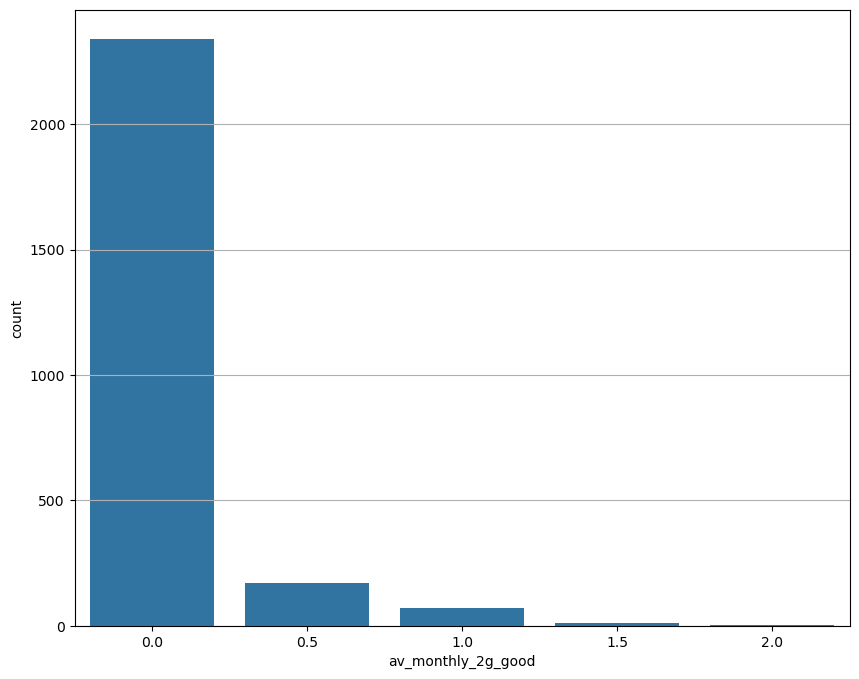

In [42]:
plt.figure(figsize=(10,8))
plt.grid()
sns.countplot(x= HVC_telecom[HVC_telecom['Churn'] == 1].av_monthly_2g_good)
plt.show()

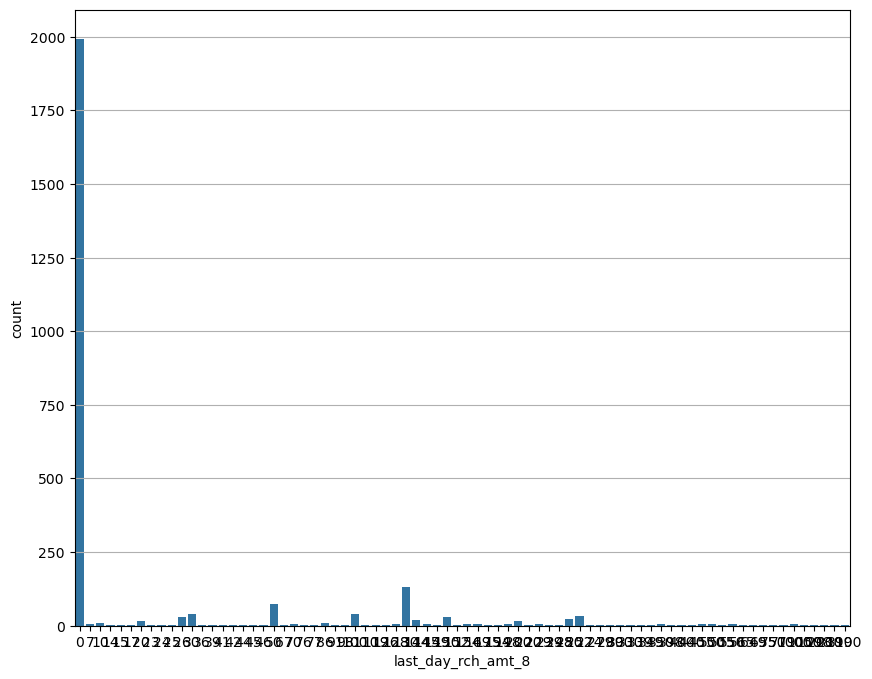

In [43]:
plt.figure(figsize=(10,8))
plt.grid()
sns.countplot(x= HVC_telecom[HVC_telecom['Churn'] == 1].last_day_rch_amt_8)
plt.show()